# DS 3000 - Assignment 10

**Student Name**: Savir Khanna

**Date**: 11/8/06


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Data Discovery & Preparation (10 pts) 

Begin your analysis by loading the data directly from the URL. Then:
Perform EDA to uncover hidden patterns in the data
Handle missing and invalid data (document your strategy!)
Create a histogram of birth weights and explain what the distribution reveals about your ML challenge
load the data directly from the URL into a DataFrame.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = "https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K"
df = pd.read_csv(data)

In [10]:
df.shape

(1236, 8)

In [11]:
df = df.dropna()
df

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
5,6,136,286.0,0,25.0,62.0,93.0,0.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


In [13]:
df.isna().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [14]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,624.812606,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,356.777054,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,317.250000,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,625.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,934.750000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [15]:
correlation_matrix = df.corr()
print(correlation_matrix)

               case       bwt  gestation    parity       age    height  \
case       1.000000 -0.064523   0.020642  0.197342  0.013212 -0.032239   
bwt       -0.064523  1.000000   0.407543 -0.043908  0.026983  0.203704   
gestation  0.020642  0.407543   1.000000  0.080916 -0.053425  0.070470   
parity     0.197342 -0.043908   0.080916  1.000000 -0.351041  0.043543   
age        0.013212  0.026983  -0.053425 -0.351041  1.000000 -0.006453   
height    -0.032239  0.203704   0.070470  0.043543 -0.006453  1.000000   
weight    -0.060275  0.155923   0.023655 -0.096362  0.147322  0.435287   
smoke      0.005844 -0.246800  -0.060267 -0.009599 -0.067772  0.017507   

             weight     smoke  
case      -0.060275  0.005844  
bwt        0.155923 -0.246800  
gestation  0.023655 -0.060267  
parity    -0.096362 -0.009599  
age        0.147322 -0.067772  
height     0.435287  0.017507  
weight     1.000000 -0.060281  
smoke     -0.060281  1.000000  


Correlation matrix looks good, no significant outliers.

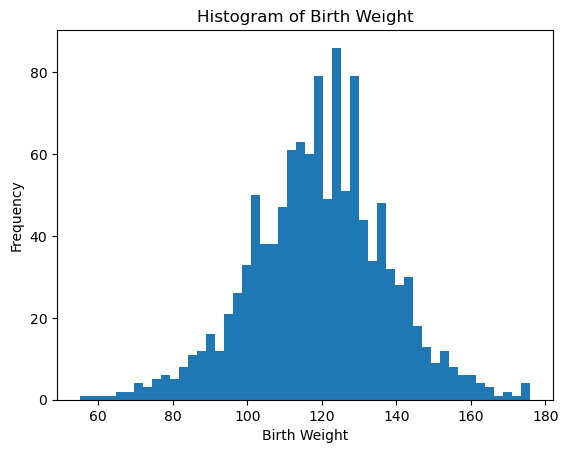

In [20]:
plt.hist(df['bwt'], bins = 50)
plt.title('Histogram of Birth Weight')
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.show()

Histogram shows a almost normal distribution, with clear peaks around the middle, indicating birth weight is a good responsive variable and does not need to be scaled via logged or squared.

## Question 2: Feature Selection - Choose Your Weapons (5 pts)

Not all features are useful for modeling! Your task:

Identify which features will be needed for prediction
You can explore correlations, hypothesis testing, or other techniques
Briefly explain the reason for the features that you selected
Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
Tip #2: Don't include birth weight as an explanatory variable.

Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.

In [24]:
from scipy import stats

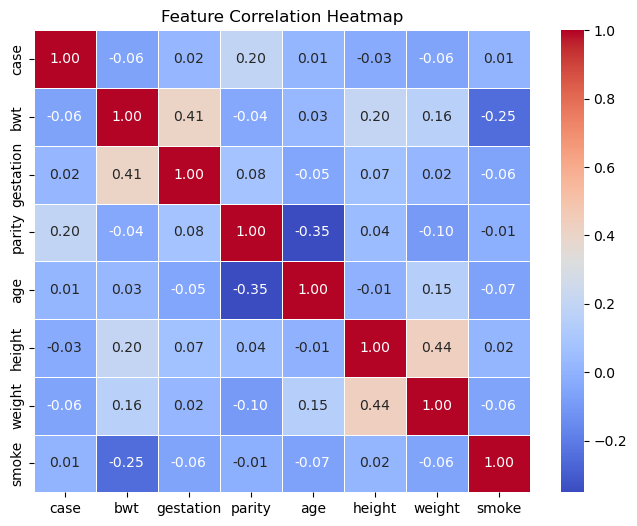

In [23]:
# identifying features needed for prediction involves finding variables that have good correlation w/each other
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

The feature with the highest correlation to bwt would be gestation at 0.41 correlation. Everything else has correlations around 0, with the only notable one being smoke at -0.25 correlation as well.

In [26]:
# checking p-values by looping through the columns
for col2 in df.columns:
    if "bwt" != col2:
        corr, p_value = stats.pearsonr(df["bwt"], df[col2])
        print(f"Correlation between bwt and {col2}: {corr:.2f}, P-value: {p_value:.3f}")

Correlation between bwt and case: -0.06, P-value: 0.027
Correlation between bwt and gestation: 0.41, P-value: 0.000
Correlation between bwt and parity: -0.04, P-value: 0.133
Correlation between bwt and age: 0.03, P-value: 0.356
Correlation between bwt and height: 0.20, P-value: 0.000
Correlation between bwt and weight: 0.16, P-value: 0.000
Correlation between bwt and smoke: -0.25, P-value: 0.000


Previous observation of gestation is supported by the pvalue of 0, so there is a significant statistical difference in the variables that explains that they must not be independent. It's also important to note height, weight, and smoke recieved similar p-values but had lower correlations on the correlation matrix.

## Question 3: Data Partitioning (2 pts)

Create reproducible train/test splits
Encode categorical variables properly. Tip: training set first, then test set using the appropriate method.

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [29]:
X = df[['gestation', 'parity', 'age', 'height', 'weight','smoke']]
y = df["bwt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Question 4: Build Your First Model - Random Forest (3 pts)

Build a Random Forest model to predict birth weight
Critical Decision: Are you performing classification or regression? Choose wisely!

In [44]:
# regression because we aren't clasifying variables into categories, rather calculating a prediction of one varibale based off another
regressor = RandomForestRegressor(n_estimators=200, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Question 5: Test Your Model (2 pts)

Evaluate your predictions using appropriate metrics and explain the results
Remember: Classification and regression require different evaluation approaches
Round all results to 2 decimal places

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"The r-squared score would be {round(r2, 2)}.")

The r-squared score would be 0.25.


## Question 6: Random Forest Model Tuning (10 pts)

What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight? Justify your response.
Time to optimize:

Experiment with the n_estimators parameter (control your forest size!)
Test AT LEAST 10 different values (excluding the default)
Document each experiment: create → evaluate → compare. Note: Show all your steps to create, evaluate and tune each version of the model.
Identify your best model! Justify the reason.

In [55]:
storage = {}
for n in range(5, 100, 5):
    regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    storage[n] = round(r2, 3)
    
for key in storage:
    print(f"{key}: {storage[key]}")

5: 0.183
10: 0.191
15: 0.223
20: 0.254
25: 0.245
30: 0.254
35: 0.252
40: 0.262
45: 0.271
50: 0.266
55: 0.263
60: 0.267
65: 0.265
70: 0.263
75: 0.257
80: 0.257
85: 0.255
90: 0.255
95: 0.252


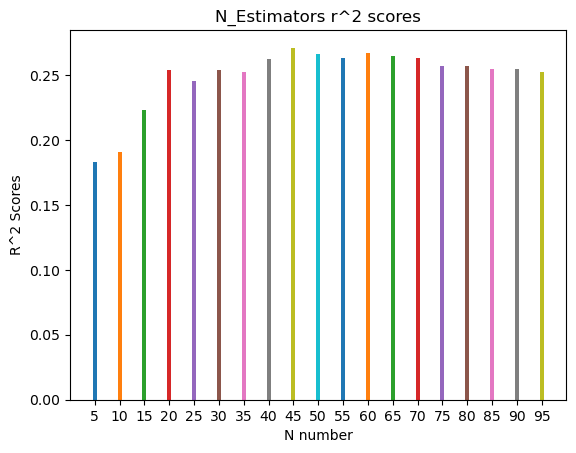

In [62]:
keys = sorted(storage.keys())       
for key in storage:
    plt.bar(key, storage[key])

plt.title("N_Estimators r^2 scores")
plt.xlabel("N number")
plt.ylabel("R^2 Scores")
plt.xticks(keys)

plt.show()

Based off the graph and the previous r-squared values we found, it would make sense to around 45 for the n_estimators as that had the highest regression of 0.271.

## Question 7: Alternative Analysis - k-NN Algorithm (15 pts)

Repeat your model-building (i.e. steps 4-6) with the k-NN algorithm:

Build, evaluate, and tune using at least 10 different k values.
Don't choose k arbitrarily - be strategic!
Document your entire optimization steps
Identify your k-NN best model

In [56]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [57]:
r2 = r2_score(y_test, y_pred)
print(f"The r-squared score would be {round(r2, 2)}.")

The r-squared score would be 0.18.


In [58]:
storage_knn = {}
for n in range(5, 100, 5):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    storage_knn[n] = round(r2, 3)
    
for key in storage:
    print(f"{key}: {storage_knn[key]}")

5: 0.18
10: 0.18
15: 0.18
20: 0.18
25: 0.18
30: 0.18
35: 0.18
40: 0.18
45: 0.18
50: 0.18
55: 0.18
60: 0.18
65: 0.18
70: 0.18
75: 0.18
80: 0.18
85: 0.18
90: 0.18
95: 0.18


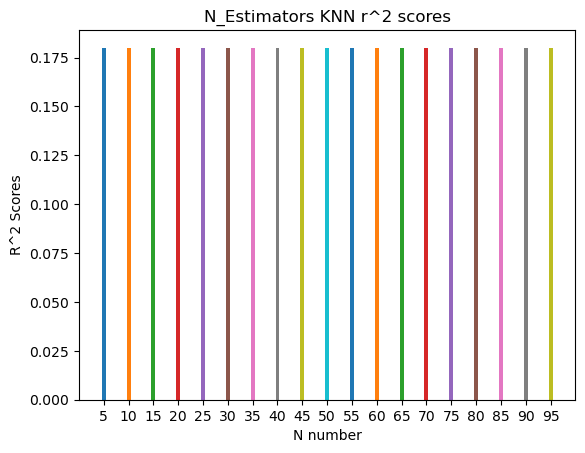

In [63]:
keys = sorted(storage_knn.keys())       
for key in storage_knn:
    plt.bar(key, storage_knn[key])

plt.title("N_Estimators KNN r^2 scores")
plt.xlabel("N number")
plt.ylabel("R^2 Scores")
plt.xticks(keys)

plt.show()

For almost every n_estimator for KNN it is the exact same at 0.18, therefore let's go to higher n's.

In [66]:
storage_knn = {}
for n in range(100, 10000, 250):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    storage_knn[n] = round(r2, 3)
    
for key in storage_knn:
    print(f"{key}: {storage_knn[key]}")

100: 0.18
350: 0.18
600: 0.18
850: 0.18
1100: 0.18
1350: 0.18
1600: 0.18
1850: 0.18
2100: 0.18
2350: 0.18
2600: 0.18
2850: 0.18
3100: 0.18
3350: 0.18
3600: 0.18
3850: 0.18
4100: 0.18
4350: 0.18
4600: 0.18
4850: 0.18
5100: 0.18
5350: 0.18
5600: 0.18
5850: 0.18
6100: 0.18
6350: 0.18
6600: 0.18
6850: 0.18
7100: 0.18
7350: 0.18
7600: 0.18
7850: 0.18
8100: 0.18
8350: 0.18
8600: 0.18
8850: 0.18
9100: 0.18
9350: 0.18
9600: 0.18
9850: 0.18


All of them are the same regardless, ultimately meaning the n_neighbors neighbor don't actually matter.

## Question 8: The Best Model (3 pts)

Identify your best k-NN and Random Forest models. 

Compare your best Random Forest vs. your best k-NN model
Declare the winner among the two models and justify your choice
Which model would you deploy to help medical professionals? Justify your response.

The model I would 100% reccomend to medical professionals would be the Random Forest Regressor Model, which had a higher model accuracy for n_neighbors = 45, an accuracy of 0.27 larger than the 0.18 of KNN classifier.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


In [16]:
import random

In [44]:
def rand3():
    random_number = random.randint(0, 2)
    return random_number
def rand10():
    x = rand3()
    y = rand3()
    z = rand3()
    result = x*9 + y*3 + z
    if result > 10:
        result = rand10()
    return result
def main():
    storage = {}
    for n in range(100000):
        num = rand10()
        if num not in storage:
            storage[num] = 0
        storage[num] += 1
        
    for k, v in sorted(storage.items()):
        print(f"{k}: {v}")

In [45]:
main()

0: 9009
1: 9275
2: 9204
3: 9039
4: 9029
5: 8993
6: 9061
7: 9086
8: 9130
9: 8969
10: 9205
